# Exercise: NEISS, Question Set F

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- String replacement using regular expressions
- Using codebooks

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd
df = pd.read_csv('nss15.tsv', sep='\t', error_bad_lines=False)
df

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
5,150721815,07/02/2015,32,5.6748,C,216,2,1,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."
6,150713483,06/08/2015,93,15.7762,V,25,1,2,NaN,51,NaN,33,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...
7,150704114,06/14/2015,56,83.2157,S,53,1,1,NaN,57,NaN,30,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN
8,150736558,07/16/2015,70,83.2157,S,98,1,2,NaN,59,NaN,76,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN
9,150734928,07/13/2015,51,74.8813,L,48,2,2,NaN,53,NaN,79,1,5,0,4057,1807.0,"48 YO F, C/O RT FLANK PAIN 6 DAYS S/P FALL WAS...",ABLE WHICH HIT THE FLOOR STRIKING RT FLANK DX ...


### Check that your dataframe has 357727 rows and 19 columns.

In [2]:
df.shape

(357727, 19)

### List the columns and their data types

In [3]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [ ]:
# trmt_date = treatment date
# race = code for race of patient
# race_other = free text for other, not coded race
# prod1 = main involved product
# narr1 = description of event

# Cleaning up a column

Take a look at the **race** column. How many rows of each race are there?

In [4]:
df['race'].value_counts()

1    145813
0    138666
2     48868
3     18884
4      4130
5      1000
6       366
Name: race, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 28 of the column definitions file.

In [5]:
race_dict = {
    1: 'White',
    2: 'Black',
    4: 'Asian',
    5: 'American Indian',
    6: 'Pacific Islander',
    3: 'Other',
    0: 'Not Stated'
}

In [6]:
for race_code in race_dict.keys():
    df['race'] = df['race'].replace(race_code,race_dict[race_code])

## Confirm you have 145813 White, 138666 not stated, and 48868 Black.

In [7]:
df['race'].value_counts()

White               145813
Not Stated          138666
Black                48868
Other                18884
Asian                 4130
American Indian       1000
Pacific Islander       366
Name: race, dtype: int64

## Graph the number of each race, but don’t included the “Not Stated” records

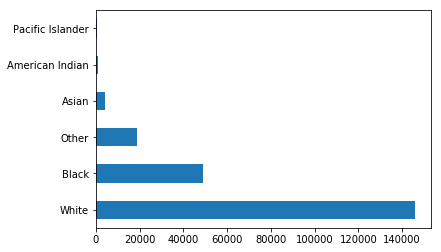

In [8]:
%matplotlib inline
df[df['race'] != 'Not Stated']['race'].value_counts().plot(kind='barh')

## "Not Stated" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [9]:
import numpy as np
df.race.replace("Not Stated", np.nan, inplace=True)

## Graph the count of each race, but don’t included the “Not Stated” records

Yes, again! The code you use should be different this time.

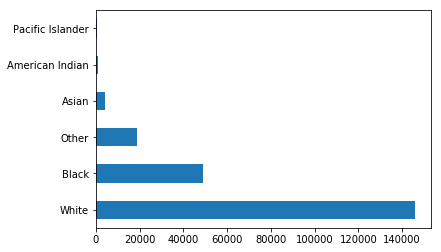

In [10]:
df['race'].value_counts().plot(kind='barh')

## Graph the top 10 most popular products for injuries 

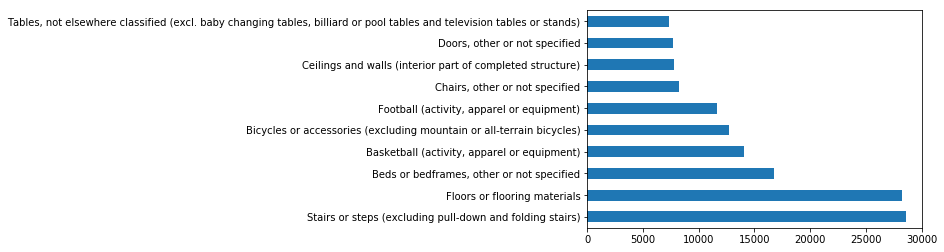

In [89]:
# get product description by joining with categories table

df.prod1 = df.prod1.astype(str).str.pad(4, fillchar='0')
df_categories = pd.read_csv('categories-cleaned.txt', header=None, names = ['Code', 'Text Product'])
df_categories['Code'] = df_categories.Code.astype(str).str.pad(4, fillchar='0')
df_combined = df.merge(df_categories, left_on = 'prod1', right_on = 'Code')
df_combined['Text Product'].value_counts().head(10).plot(kind='barh')

# Cleaning up `race_other`

## `race_other` is a field for free-form race input. How many patients have a race of "HISPANIC"?

In [12]:
df[df['race_other'].astype(str).str.contains('HISP*')]['trmt_date'].count()

15737

## What are the top 5 most popular "other" races?

In [13]:
df.race.replace("NaN", np.nan, inplace=True)
df['race_other'].value_counts().head(5)

HISPANIC        14389
MULTI-RACIAL     1727
UNKNOWN          1554
HISP             1334
NS                495
Name: race_other, dtype: int64

## Searching for multiracial patients

Wow, this data entry is terrible. “Multiracial” is spelled as **MULT RACIAL**, **MULTIPLE RACIAL**, and many more. How many different spellings can you find? **Use only one line to find the spellings.**

- Tip: Be sure to **ignore the na values**.
- Tip: You should probably find the multiracial-ish rows and then `value_counts` their `other_race`
- Tip: Maybe... ask me about .str.contains support for regular expressions?

In [14]:
df[df['race_other'].astype(str).str.contains('MUL*', case=False)]['race_other'].value_counts()

MULTI-RACIAL       1727
MULTIRACIAL         146
MULTI                22
MULTI RACIAL         12
MULTIPLE RACIAL       1
MULT RACIAL           1
MULTIRACAIL           1
MULTRACIAL            1
Name: race_other, dtype: int64

## Replace all of those spellings with “MULTIRACIAL.”

Confirm that you’ve ended up with about 1900 MULTIRACIAL rows (yours might be anywhere between 1899-1910, depending on how many spellings you caught)

In [15]:
df.loc[df['race_other'].astype(str).str.contains('MUL*', case=False), 
'race_other'] = 'MULTIRACIAL'

In [16]:
df.race_other.value_counts().head(5)

HISPANIC       14389
MULTIRACIAL     1911
UNKNOWN         1554
HISP            1334
NS               495
Name: race_other, dtype: int64

## Do the same thing with misspellings of "Unknown"

You should end up with around 1660-1670 UNKNOWN entries

In [20]:
df[df['race_other'].astype(str).str.contains('UNK*', case=False)]['race_other'].value_counts()

UNKNOWN     1554
UNKN         105
UNK            2
UNKNKOWN       1
UNKNOKWN       1
UNKNONW        1
UNNOWN         1
UNKOWN         1
UNKNONWN       1
Name: race_other, dtype: int64

In [21]:
df.loc[df['race_other'].astype(str).str.contains('UNK*', case=False),'race_other'] = 'UNKNOWN'

In [22]:
df.race_other.value_counts().head(5)

HISPANIC       14389
MULTIRACIAL     1911
UNKNOWN         1667
HISP            1334
NS               495
Name: race_other, dtype: int64

## What variations on HISPANIC can you find? Standardize them to HISPANIC.

In [23]:
df[df['race_other'].astype(str).str.contains('HISP*', case=False)]['race_other'].value_counts()

HISPANIC           14389
HISP                1334
HISPNANIC              3
HISPANIC S/P B         1
QRYOMHISPANIC          1
HISPANI                1
HISO                   1
HISPAINC               1
HISPANIE               1
HISPAANIC              1
HISPAINIC              1
HISPPANIC              1
HISPANIC/LATINO        1
HISPNIC                1
Name: race_other, dtype: int64

In [39]:
df.loc[df['race_other'].astype(str).str.contains('HISP*', case=False),'race_other'] = 'HISPANIC'

## Now try counting the number of hispanic people again.

In [40]:
df.race_other.value_counts().head(5)

HISPANIC       15746
MULTIRACIAL     1911
UNKNOWN         1667
NS               495
SOMALI           318
Name: race_other, dtype: int64

## Seems like a lot! Update their race column to be ‘Hispanic’ instead of “Other”

You'll try to do this using skills you know, but pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [41]:
df.loc[df.race_other == 'HISPANIC', 'race'] = "Hispanic"

## Graph the frequency of each race in the dataset

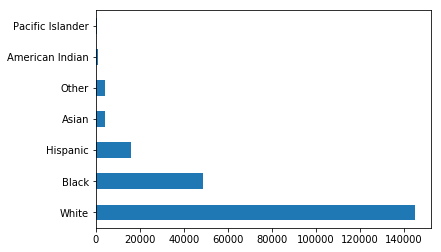

In [42]:
df['race'].value_counts().plot(kind='barh')

## Find every injury involving unicycles.

In [59]:
unicycle_accidents = df[df['prod1']==1283]
unicycle_accidents['narr1']

4171                 12YOF FELL OFF A UNICYCLE; FOREARM FX.
46499     62YOM RIDING A UNICYCLE AT THE PARK AND FELL. ...
51052     DX PN RT ARM 9YOF PATIENT WITH RT ARM PN SHE H...
119639    56 YO M PT WAS TRYING TO TEACH A COUPLE OF KID...
180961    52 YOM WAS UNICYCLING DOWN STREET WHEN HE WAS ...
Name: narr1, dtype: object

## What is the racial breakdown of people involved in unicycle accidents?

I want a **percentage**, and I want that percentage to include unknowns/NaN values.

In [63]:
value_this = unicycle_accidents['race'].value_counts(dropna=False)
sum_this = value_this.sum()
value_this / sum_this * 100

White    40.0
NaN      40.0
Black    20.0
Name: race, dtype: float64

## How about injuries with toboggans?

Is the racial breakdown significantly different than the racial breakdown of all patients?

In [66]:
toboggan_accident = df[df['prod1']==1273]
print(toboggan_accident['narr1'])
value_this = toboggan_accident['race'].value_counts(dropna=False)
sum_this = value_this.sum()
value_this / sum_this * 100

42158     25YO M HIT TREE WHILE SLEDDING  DX LUNG CONTUS...
62916     17YOF WAS SLEDDING AND INJURED BACK.  DX. COMP...
98103     10 YO M, C/O RT ANKLE PAIN SWELLING FROM TOBOG...
154511    6YOF WAS SLEDDING AND HIT A TREE AND STRUCK FO...
184105    16YOF WAS SLEDDING AND CRASHED HITTING HEAD.  ...
198210    5 YOF  WAS TOBOGGANING DOWN A  HILL & RAN INTO...
201209    R DISTAL ULNA FX/7YOWF WAS SLEDDING ON TOBOGGA...
206273    4YOM PRESENTS WITH HIP PAIN AFTER SLEDDING CRA...
320006    18YOF FELL OFF SLED AND INJURED BACK.  DX. BUR...
Name: narr1, dtype: object


NaN         55.555556
White       33.333333
Hispanic    11.111111
Name: race, dtype: float64

## Find the top 5 most dangerous products

Just use the `prod1` column.

In [90]:
df_combined['Text Product'].value_counts().head(5)

Stairs or steps (excluding pull-down and folding stairs)                28609
Floors or flooring materials                                            28255
Beds or bedframes, other or not specified                               16707
Basketball (activity, apparel or equipment)                             14095
Bicycles or accessories (excluding mountain or all-terrain bicycles)    12737
Name: Text Product, dtype: int64

## Find the top 5 most dangerous products by race

This is that weird groupby thing that you can either memorize or cut and paste every time. If you ask I'll tell it to you and you won't have to search!

In [95]:
product_count = df_combined[['Text Product','race']].groupby('race')['Text Product'].value_counts()

In [107]:
product_count.groupby(level=0).head(5)

race              Text Product                                                        
American Indian   Floors or flooring materials                                               92
                  Stairs or steps (excluding pull-down and folding stairs)                   70
                  Bicycles or accessories (excluding mountain or all-terrain bicycles)       58
                  Beds or bedframes, other or not specified                                  52
                  Basketball (activity, apparel or equipment)                                31
Asian             Stairs or steps (excluding pull-down and folding stairs)                  310
                  Floors or flooring materials                                              252
                  Beds or bedframes, other or not specified                                 219
                  Basketball (activity, apparel or equipment)                               203
                  Bicycles or accessories (exclud